<a href="https://colab.research.google.com/github/Abhishek-Iyer1/smart-colour-extraction/blob/main/Keyword_Palette_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text based palette generation


## Install and Imports


In [ ]:
!pip install opencv-contrib-python
!pip install pyunsplash
!pip install requests
import pyunsplash
import pandas as pd
from utilities import *
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

## Testing

### Blur Mapping

In [2]:
# Custom Blur Mapping. Modifying these will lead to different results
blur_dict = {
    0 : (9,9),
    1 : (9,9),
    2 : (15,15),
    3 : (21,21),
    4 : (33,33),
    5 : (45,45),
    6 : (65,65),
    7 : (111,111),
    8 : (333,333),
    9 : (333,333),
    10 : (369,369),
    11 : (413,413),
    12 : (451,451),
    13 : (491,491),
    14 : (555,555),
    15 : (555,555),
    16 : (555,555),
    17 : (555,555),
    18 : (555,555),
    19 : (555,555),
    20 : (555,555)
}

### Unsplash API

Input the keywords seperated by commas: sunrise, beautiful
Enter the number of results you want: 3


100%|██████████| 3/3 [00:15<00:00,  5.03s/it]
/content/utilities.py:122: RuntimeWarning: divide by zero encountered in log10
  sc_temp = np.array(sorted_cost)[tuple([(np.log10(sorted_cost) >= i) & (np.log10(sorted_cost) < i+1)])]


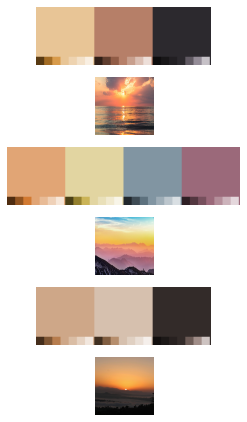

In [8]:
os.chdir(f"/content/")
queries = str(input("Input the keywords seperated by commas: "))
per_page_results = input("Enter the number of results you want: ")
api_key='INPUT YOUR UNSPLASH API KEY'
colours_wanted = 16
palettes, paths, colours_list = fetch_from_unsplash(queries, per_page_results, api_key, blur_dict, colours_wanted)
final_palettes, final_colours = calculate_cost(colours_list, colours_wanted)
final = generate_side_colours(final_colours)
back, col = final_palette(final)
plot(back, paths, colours_wanted)

### Custom Dataset

Input the keywords seperated by commas: nature, sunset, beach


100%|██████████| 5/5 [00:05<00:00,  1.01s/it]
/content/utilities.py:122: RuntimeWarning: divide by zero encountered in log10
  final_colours.append(buckets)


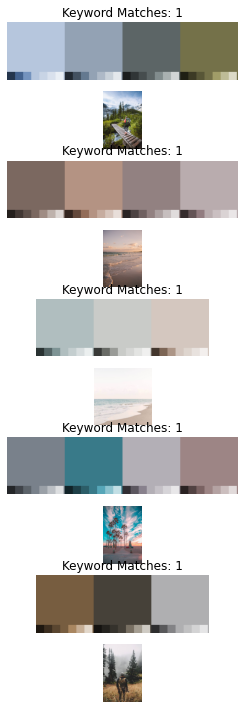

In [12]:
# User input for keyword and number of colours in each 
queries = str(input("Input the keywords seperated by commas: ")) # Keyword "all" supported
colours_wanted = 16
data= "IR Dataset"
os.chdir(f"/content/drive/MyDrive/{data}")
dataset = pd.read_excel(f"/content/drive/MyDrive/{data}/annotations/annotations.xlsx")

# Median Cut and Cost Sort
data_tuple, tallies = fetch(queries, colours_wanted, blur_dict, dataset)
palettes, paths, colours_list = data_tuple
final_palettes, final_colours = calculate_cost(colours_list, colours_wanted)
final = generate_side_colours(final_colours)
back, col = final_palette(final)
plot(back, paths, colours_wanted, tallies)

### Test Single Image

100%|██████████| 1/1 [00:01<00:00,  1.49s/it]
/content/utilities.py:122: RuntimeWarning: divide by zero encountered in log10
  final_colours.append(buckets)


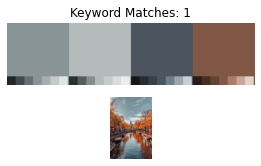

In [10]:
img_path = ["/content/drive/MyDrive/IR Dataset/images/006.jpg"]
colours_wanted = 16
palettes, paths, colours_list = execute(img_path, blur_dict, colours_wanted)
final_palettes, final_colours = calculate_cost(colours_list, colours_wanted)
final = generate_side_colours(final_colours)
back, col = final_palette(final)
plot(back, paths, colours_wanted, tallies)

## Adaptive blur 

Intuition on how adaptive blur makes it easier for isolating key colours

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

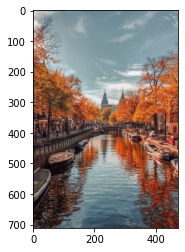

In [20]:
img_path = "/content/drive/MyDrive/IR Dataset/images/006.jpg"
im2 = cv2.imread(img_path)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
plt.imshow(im2)

In [17]:
pixel_colors = im2.reshape((np.shape(im2)[0]*np.shape(im2)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
hsv_im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2HLS)
h, l, s = cv2.split(hsv_im2)

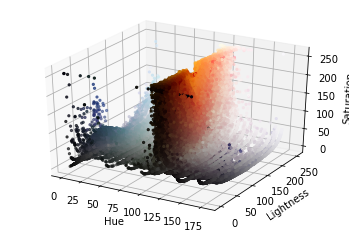

In [18]:
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), l.flatten(), s.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Lightness")
axis.set_zlabel("Saturation")
plt.show()

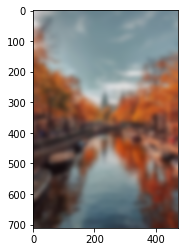

In [21]:
blur, img_copy = calc_blur(img_path, blur_dict)
img = np.array(apply_blur(img_path, blur))
plt.imshow(img)

In [22]:
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
hsv_im2 = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
h, l, s = cv2.split(hsv_im2)

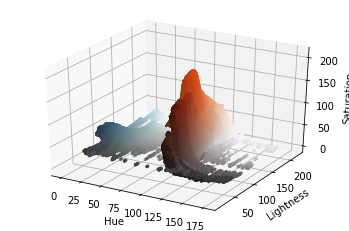

In [23]:
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), l.flatten(), s.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Lightness")
axis.set_zlabel("Saturation")
plt.show()